<a href="https://colab.research.google.com/github/bmxjuane/Juan-Emilio-Persichini-repository-/blob/main/VisualizacionPersichini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El dataset elegido reune 3078 de canciones que han sido rankeadas de acuerdo a la cantidad de reproducciones que tuvieron cada dia durante todo el mes de Diciembre de 2018.

Ejemplo: "Thank u, next" de Ariana Grande estuvo en la posicion uno el dia 3, 17, 31 de Diciembre (entre otros) pero la cancion mas reproducida de todo el listado fue "All I Want for Christmas Is You" de Mariah Carey el 24/12/2018.

Cada cancion tiene las siguientes caracteristicas: danceability, energy, speechiness, acousticness, valence, tempo.

Asi como tambien está incluido en el dataset el "track_name" (nombre de cada cancion), "position" (posicion en el ranking diario), "artist" (artista que hizo la cancion) y "streams" (cantidad de reproducciones que tuvo ese dia)

Vamos a plantear una serie de hipotesis:
- Predecir cuales valores deben contener las canciones (en sus features) para estimar si sus reproducciones van a ser altas (como para estar en el top 10 por ejemplo)
- Que dias del mes tuvieron la mayor cantidad de reproducciones
- Si existe una relacion directa entre alguna variable y la cantidad de reproducciones
- Si existe alguna relacion directa entre la posicion en el ranking y alguna variable

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
pd.read_csv('/content/global spotify 12-2018.csv')

,position,track_name,artist,streams,year,month,day,danceability,energy,speechiness,acousticness,valence,tempo
0,1,All I Want for Christmas Is You,Mariah Carey,10819009,2018,12,24,0.335,0.625,0.0386,0.1640,0.346,150.277
1,2,Last Christmas,Wham!,9098668,2018,12,24,0.735,0.478,0.0293,0.1890,0.947,107.682
2,1,"thank u, next",Ariana Grande,7450416,2018,12,3,0.724,0.647,0.0658,0.2800,0.435,106.960
3,3,Santa Tell Me,Ariana Grande,7086794,2018,12,24,0.506,0.628,0.1730,0.0545,0.556,191.708
4,4,It's Beginning to Look a Lot Like Christmas,Michael Bublé,6877219,2018,12,24,0.350,0.232,0.0331,0.9070,0.381,93.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,96,breathin,Ariana Grande,838536,2018,12,30,0.568,0.656,0.0433,0.0211,0.364,100.049
3074,97,Armed And Dangerous,Juice WRLD,832034,2018,12,30,0.736,0.670,0.3110,0.1860,0.845,130.032
3075,98,FRIENDS,Marshmello,829067,2018,12,30,0.626,0.880,0.0504,0.2050,0.534,95.079
3076,99,Rise,Jonas Blue,826239,2018,12,30,0.687,0.785,0.0333,0.3270,0.655,106.046


In [36]:
df = pd.read_csv('/content/global spotify 12-2018.csv')

In [37]:
df.shape

(3078, 13)

In [38]:
df.head(5)

,position,track_name,artist,streams,year,month,day,danceability,energy,speechiness,acousticness,valence,tempo
0,1,All I Want for Christmas Is You,Mariah Carey,10819009,2018,12,24,0.335,0.625,0.0386,0.1640,0.346,150.277
1,2,Last Christmas,Wham!,9098668,2018,12,24,0.735,0.478,0.0293,0.1890,0.947,107.682
2,1,"thank u, next",Ariana Grande,7450416,2018,12,3,0.724,0.647,0.0658,0.2800,0.435,106.960
3,3,Santa Tell Me,Ariana Grande,7086794,2018,12,24,0.506,0.628,0.1730,0.0545,0.556,191.708
4,4,It's Beginning to Look a Lot Like Christmas,Michael Bublé,6877219,2018,12,24,0.350,0.232,0.0331,0.9070,0.381,93.269


Ya empezando a sacar conclusiones podemos determinar que de acuerdo al siguiente grafico la mayor cantidad de reproducciones se dió en los dias 24 y 25 teniendo como principal motivo el festejo de Navidad.

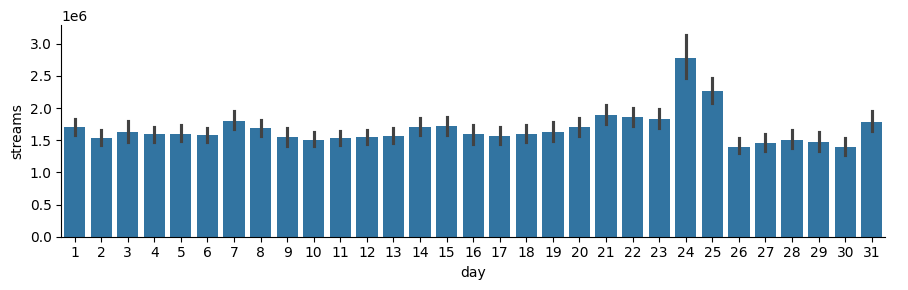

In [39]:
sns.catplot(x="day", y="streams", data=df, kind = "bar", height = 3, aspect = 3)

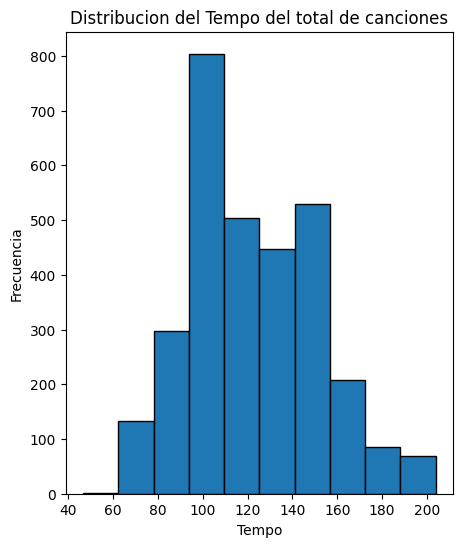

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
plt.hist(df['tempo'], bins=10, edgecolor='black')
plt.xlabel('Tempo')
plt.ylabel('Frecuencia')
_ = plt.title('Distribucion del Tempo del total de canciones')

De acuerdo al grafico precedente podemos decir que la mayoria de las canciones tienen un tempo alrededor a 100

Asi tambien podemos indicar con el siguiente grafico que aquellas canciones que son mas "energicas" son mas "bailables.

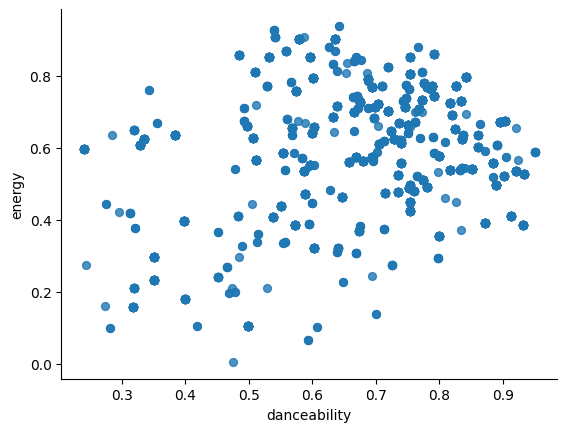

In [53]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='danceability', y='energy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Luego metiendonos con el top 10 de canciones mas escuchadas, vamos a sacar algunas conclusiones acerca de este grupo.

In [43]:
dftop10 = df[df['streams'] >= 5400000]

In [44]:
dftop10

,position,track_name,artist,streams,year,month,day,danceability,energy,speechiness,acousticness,valence,tempo
0,1,All I Want for Christmas Is You,Mariah Carey,10819009,2018,12,24,0.335,0.625,0.0386,0.1640,0.346,150.277
1,2,Last Christmas,Wham!,9098668,2018,12,24,0.735,0.478,0.0293,0.1890,0.947,107.682
2,1,"thank u, next",Ariana Grande,7450416,2018,12,3,0.724,0.647,0.0658,0.2800,0.435,106.960
3,3,Santa Tell Me,Ariana Grande,7086794,2018,12,24,0.506,0.628,0.1730,0.0545,0.556,191.708
4,4,It's Beginning to Look a Lot Like Christmas,Michael Bublé,6877219,2018,12,24,0.350,0.232,0.0331,0.9070,0.381,93.269
5,5,Jingle Bell Rock,Bobby Helms,6040533,2018,12,24,0.754,0.424,0.0363,0.6430,0.806,119.705
6,6,It's the Most Wonderful Time of the Year,Andy Williams,5960727,2018,12,24,0.240,0.598,0.0370,0.7660,0.776,202.082
7,3,Rockin' Around The Christmas Tree,Brenda Lee,5786608,2018,12,25,0.589,0.472,0.0502,0.6140,0.898,67.196
8,8,Happy Xmas (War Is Over) - Remastered,John Lennon,5692945,2018,12,24,0.328,0.607,0.0315,0.3190,0.395,146.539
9,9,Do They Know It's Christmas? - 1984 Version,Band Aid,5497071,2018,12,24,0.599,0.642,0.0363,0.1640,0.349,115.412


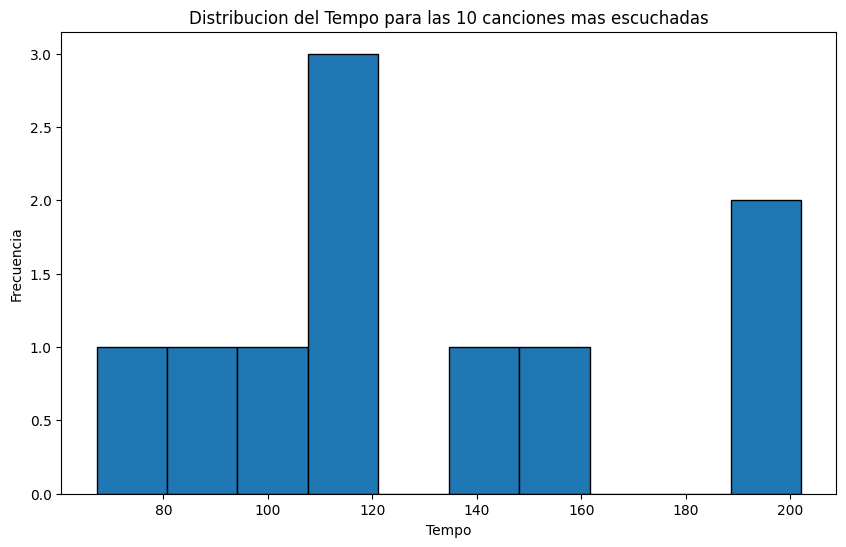

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(dftop10['tempo'], bins=10, edgecolor='black')
plt.xlabel('Tempo')
plt.ylabel('Frecuencia')
_ = plt.title('Distribucion del Tempo para las 10 canciones mas escuchadas')


In [50]:
print(dftop10['tempo'].mode())

0     67.196
1     93.269
2    106.960
3    107.682
4    115.412
5    119.705
6    146.539
7    150.277
8    191.708
9    202.082
Name: tempo, dtype: float64


Podemos ver que en las canciones mas escuchadas el tempo que mas se repite tambien es alrededor de 100

In [14]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'valence']

Con el siguiente grafico podemos determinar que el exito de una cancion no va a estar determinado por la variable "danceability" y la gente va a seguir eligiendo la cancion por mas que no sea bailable.

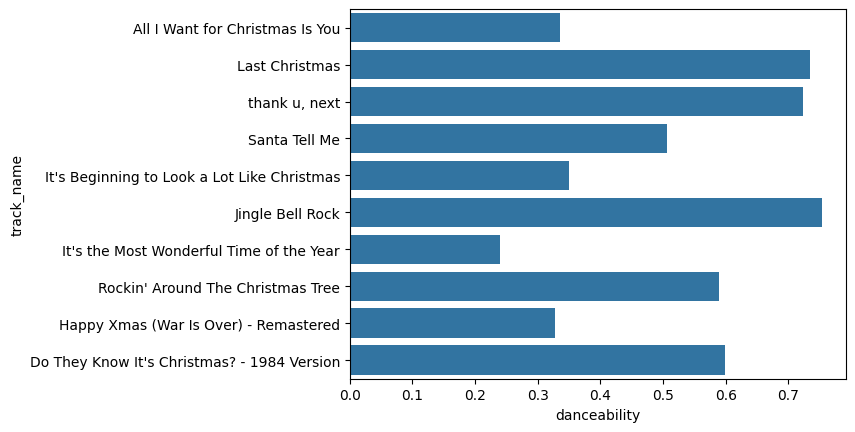

In [51]:
sns.barplot(data=dftop10, y='track_name', x='danceability')
plt.show()

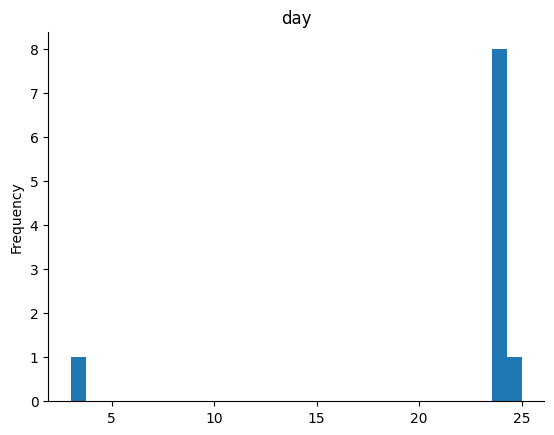

In [54]:
dftop10['day'].plot(kind='hist', bins=30, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

El grafico de arriba nos indica que la mayoria de las canciones del top 10 están fueron reproducidas entre el 24 y 25 de Diciembre. Nuevamente el motivo principal fue el dia de Navidad